In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LightSource
from os.path import join
%matplotlib inline

In [19]:
ls /glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_unweighted/model.yml

/glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_unweighted/model.yml


In [8]:
path = "/glade/p/cisl/aiml/ai2es/winter_ptypes/models/evidential_unweighted/evaluate/"
mod_num = 1
test_data = pd.read_parquet(join(path, f"test_{mod_num:d}.parquet"))


In [10]:
for col in test_data.columns:
    print(col)

T_DEWPOINT_C_0_m
T_DEWPOINT_C_250_m
T_DEWPOINT_C_500_m
T_DEWPOINT_C_750_m
T_DEWPOINT_C_1000_m
T_DEWPOINT_C_1250_m
T_DEWPOINT_C_1500_m
T_DEWPOINT_C_1750_m
T_DEWPOINT_C_2000_m
T_DEWPOINT_C_2250_m
T_DEWPOINT_C_2500_m
T_DEWPOINT_C_2750_m
T_DEWPOINT_C_3000_m
T_DEWPOINT_C_3250_m
T_DEWPOINT_C_3500_m
T_DEWPOINT_C_3750_m
T_DEWPOINT_C_4000_m
T_DEWPOINT_C_4250_m
T_DEWPOINT_C_4500_m
T_DEWPOINT_C_4750_m
T_DEWPOINT_C_5000_m
T_DEWPOINT_C_5250_m
T_DEWPOINT_C_5500_m
T_DEWPOINT_C_5750_m
T_DEWPOINT_C_6000_m
T_DEWPOINT_C_6250_m
T_DEWPOINT_C_6500_m
T_DEWPOINT_C_6750_m
T_DEWPOINT_C_7000_m
T_DEWPOINT_C_7250_m
T_DEWPOINT_C_7500_m
T_DEWPOINT_C_7750_m
T_DEWPOINT_C_8000_m
T_DEWPOINT_C_8250_m
T_DEWPOINT_C_8500_m
T_DEWPOINT_C_8750_m
T_DEWPOINT_C_9000_m
T_DEWPOINT_C_9250_m
T_DEWPOINT_C_9500_m
T_DEWPOINT_C_9750_m
T_DEWPOINT_C_10000_m
T_DEWPOINT_C_10250_m
T_DEWPOINT_C_10500_m
T_DEWPOINT_C_10750_m
T_DEWPOINT_C_11000_m
T_DEWPOINT_C_11250_m
T_DEWPOINT_C_11500_m
T_DEWPOINT_C_11750_m
T_DEWPOINT_C_12000_m
T_DEWPOINT_C_1225

In [12]:
rap_pred_vars = ["CRAIN", "CSNOW", "CICEP", "CFRZR"]
test_data[rap_pred_vars]

2.0

In [13]:
test_data["true_label"]

0     0
1     0
2     3
3     1
4     1
     ..
21    0
22    0
23    0
24    0
26    0
Name: true_label, Length: 396696, dtype: int64

In [15]:
mping_cols = ["report_count", "ra_percent",
"sn_percent",
"pl_percent",
"fzra_percent"]
test_data[mping_cols]

,report_count,ra_percent,sn_percent,pl_percent,fzra_percent
0,2,1.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,1.0
3,1,0.0,1.0,0.0,0.0
4,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21,1,1.0,0.0,0.0,0.0
22,1,1.0,0.0,0.0,0.0
23,2,1.0,0.0,0.0,0.0
24,1,1.0,0.0,0.0,0.0


In [21]:
pred_cols = ["pred_label",
             "pred_conf1",
            "pred_conf2",
            "pred_conf3",
            "pred_conf4",
            "evidential",
            "aleatoric",
            "epistemic"]
test_data[pred_cols]

,pred_label,pred_conf1,pred_conf2,pred_conf3,pred_conf4,evidential,aleatoric,epistemic
0,0,0.984163,0.005279,0.005279,0.005279,0.021116,0.015504,0.000082
1,0,0.984909,0.005030,0.005030,0.005030,0.020122,0.014789,0.000074
2,0,0.358332,0.120787,0.240523,0.280357,0.443749,0.206970,0.022961
3,1,0.071313,0.526784,0.228157,0.173747,0.285251,0.232689,0.016594
4,1,0.038965,0.883105,0.038965,0.038965,0.155860,0.099359,0.003872
...,...,...,...,...,...,...,...,...
21,0,0.991092,0.002969,0.002969,0.002969,0.011878,0.008803,0.000026
22,0,0.986444,0.004519,0.004519,0.004519,0.018074,0.013312,0.000060
23,0,0.985490,0.004837,0.004837,0.004837,0.019347,0.014231,0.000069
24,0,0.986524,0.004492,0.004492,0.004492,0.017968,0.013235,0.000059


In [1]:
import xarray as xr

In [2]:
ds = xr.open_zarr("https://ncar-ml-ptype.s3-us-west-2.amazonaws.com/hrrr/20230103/0000/MILES_ptype_hrrr_2023-01-03_0000_f03.zarr")

/glade/scratch/dgagne/ipykernel_198744/3973087722.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(ds["longitude"], ds["latitude"], ds["ML_frzr"][0])


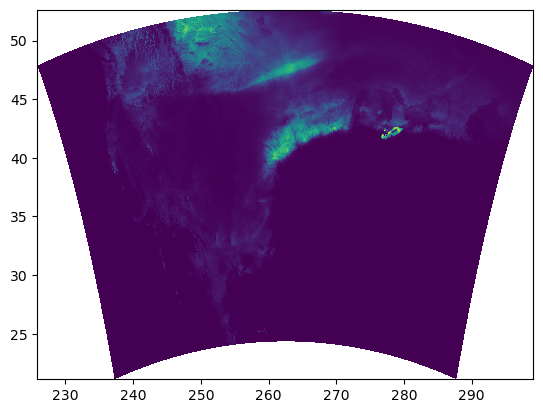

In [7]:
plt.pcolormesh(ds["longitude"], ds["latitude"], ds["ML_frzr"][0])

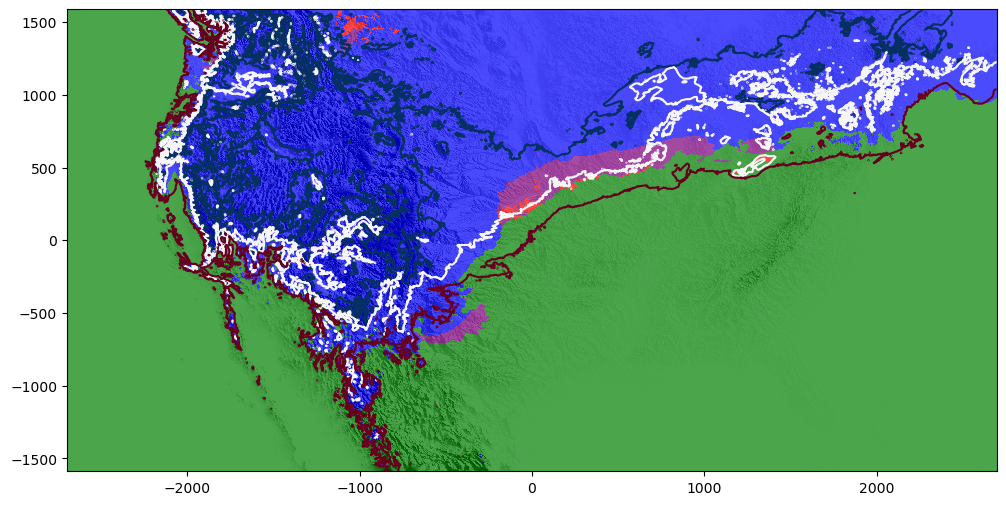

In [50]:
ml_pred = np.zeros(ds["ML_cfrzr"].shape)
ml_cols = ["ML_crain", "ML_csnow", "ML_cicep", "ML_cfrzr"]
for pt, ptype_var in enumerate(ml_cols):
    ml_pred[ds[ptype_var] > 0] = pt + 1
plt.figure(figsize=(12, 6))
plt.contour(ds["x_projection_coordinate"] / 1000, ds["y_projection_coordinate"] / 1000, ds["t2m"][0] - 273, [-5, 0, 5],
           cmap="RdBu_r")
ls = LightSource(azdeg=125, altdeg=20)
rgb = ls.shade(ds["orog"][0].values, cmap=plt.cm.gray_r)
plt.pcolormesh(ds["x_projection_coordinate"] / 1000, ds["y_projection_coordinate"] / 1000, rgb)
plt.pcolormesh(ds["x_projection_coordinate"] / 1000, ds["y_projection_coordinate"] / 1000, 
               ml_pred[0], cmap=ListedColormap(["green", "blue", "purple", "red"]), alpha=0.7)

In [35]:
ds["orog"]

<xarray.DataArray 'orog' (time: 1, y: 1059, x: 1799)>
dask.array<open_dataset-6f4cd784448ce5bfa688a6eaac5e3af0orog, shape=(1, 1059, 1799), dtype=float32, chunksize=(1, 265, 450), chunktype=numpy.ndarray>
Coordinates:
    latitude                 (y, x) float32 dask.array<chunksize=(265, 450), meta=np.ndarray>
    longitude                (y, x) float32 dask.array<chunksize=(265, 450), meta=np.ndarray>
    step                     timedelta64[ns] ...
  * time                     (time) datetime64[ns] 2023-01-03
    valid_time               datetime64[ns] ...
    x_projection_coordinate  (x) float32 dask.array<chunksize=(1799,), meta=np.ndarray>
    y_projection_coordinate  (y) float32 dask.array<chunksize=(1059,), meta=np.ndarray>
Dimensions without coordinates: y, x
Attributes: (12/34)
    GRIB_DxInMetres:                          3000.0
    GRIB_DyInMetres:                          3000.0
    GRIB_LaDInDegrees:                        38.5
    GRIB_Latin1InDegrees:                     38.5
    GRIB_Latin2InDegrees:                     38.5
    GRIB_LoVInDegrees:                        262.5
    ...                                       ...
    GRIB_typeOfLevel:                         surface
    GRIB_units:                               m
    coordinates:                              time step surface latitude long...
    long_name:                                Orography
    standard_name:                            geopotential_height
    units:                                    m

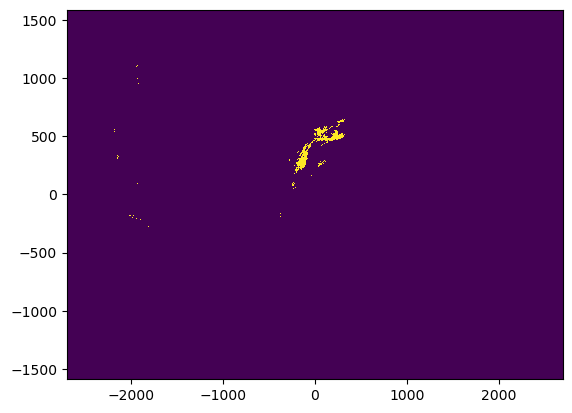

In [14]:
plt.pcolormesh(ds["x_projection_coordinate"] / 1000, ds["y_projection_coordinate"] / 1000, ds["cicep"][0])

In [8]:
ds

<xarray.Dataset>
Dimensions:                  (time: 1, y: 1059, x: 1799)
Coordinates:
    latitude                 (y, x) float32 dask.array<chunksize=(265, 450), meta=np.ndarray>
    longitude                (y, x) float32 dask.array<chunksize=(265, 450), meta=np.ndarray>
    step                     timedelta64[ns] ...
  * time                     (time) datetime64[ns] 2023-01-03
    valid_time               datetime64[ns] ...
    x_projection_coordinate  (x) float32 dask.array<chunksize=(1799,), meta=np.ndarray>
    y_projection_coordinate  (y) float32 dask.array<chunksize=(1059,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables: (12/17)
    ML_cfrzr                 (time, y, x) uint8 dask.array<chunksize=(1, 265, 900), meta=np.ndarray>
    ML_cicep                 (time, y, x) uint8 dask.array<chunksize=(1, 265, 900), meta=np.ndarray>
    ML_crain                 (time, y, x) uint8 dask.array<chunksize=(1, 265, 900), meta=np.ndarray>
    ML_csnow                 (time, y, x) uint8 dask.array<chunksize=(1, 265, 900), meta=np.ndarray>
    ML_frzr                  (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
    ML_icep                  (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
    ...                       ...
    csnow                    (time, y, x) uint8 dask.array<chunksize=(1, 265, 900), meta=np.ndarray>
    d2m                      (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
    orog                     (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
    t2m                      (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
    u10                      (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
    v10                      (time, y, x) float32 dask.array<chunksize=(1, 265, 450), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_edition:            2
    GRIB_subCentre:          0
    history:                 2023-05-25T12:29 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             US National Weather Service - NCEP
    projection:              {'crs_wkt': 'PROJCRS["unknown",BASEGEOGCRS["unkn...